
# Human Activity Recognition (HAR) Dataset Classification

## Introduction
The Human Activity Recognition dataset contains data from the accelerometers and gyroscopes of smartphones, recording various human activities like walking, sitting, etc. The objective of this notebook is to classify these activities based on sensor data.


In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [19]:

# Loading the Dataset
train_data = pd.read_csv('C:/Users/rober/Downloads/har_dataset/train.csv')
test_data = pd.read_csv('C:/Users/rober/Downloads/har_dataset/test.csv')

# Replace a random set of values in the training and test sets with NaN values
# This should affect 20% of the values in each dataset
# Do not change the "Activity" column
mcar_frac = 0.35
columns = train_data.columns[1:-1]
train_data[columns] = train_data[columns].mask(np.random.random(train_data[columns].shape) < mcar_frac)
test_data[columns] = test_data[columns].mask(np.random.random(test_data[columns].shape) < mcar_frac)

# Display the first few rows of the training dataset
print(train_data.head())


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X   
0           0.288585          -0.020294          -0.132905         -0.995279  \
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y   
0         -0.983111         -0.913526         -0.995112         -0.983185  \
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z   
count        7352.000000        4777.000000        4755.000000  \
mean            0.274488          -0.017018          -0.109522   
std             0.070261           0.041359           0.057054   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024333          -0.120597   
50%             0.277193          -0.017161          -0.108634   
75%             0.288461          -0.010699          -0.098134   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X   
count       4752.000000       4741.000000       4759.000000       4796.000000  \
mean          -0.611531         -0.512983         -0.606853         -0.628044   
std            0.446970          0.499937          0.416940          0.427933   
min           -1.000000         -0.999873         -1.000000         -0.999867   


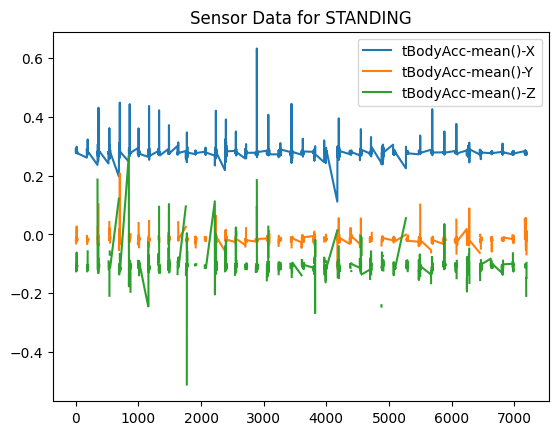

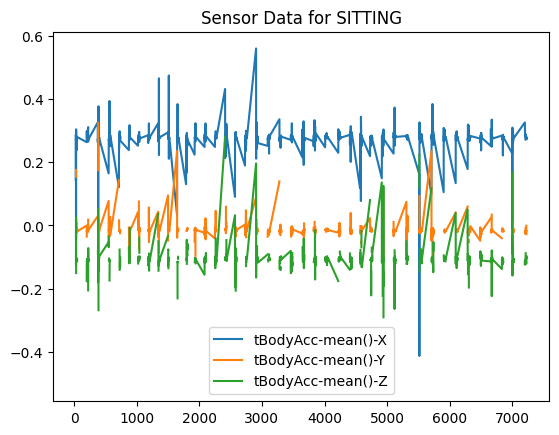

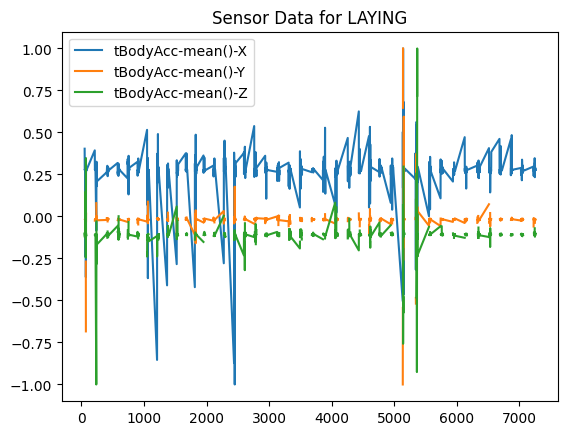

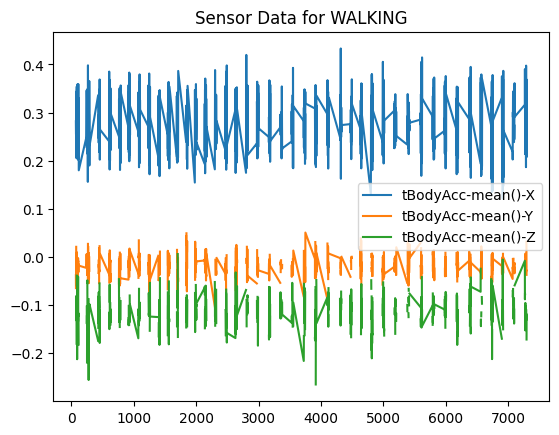

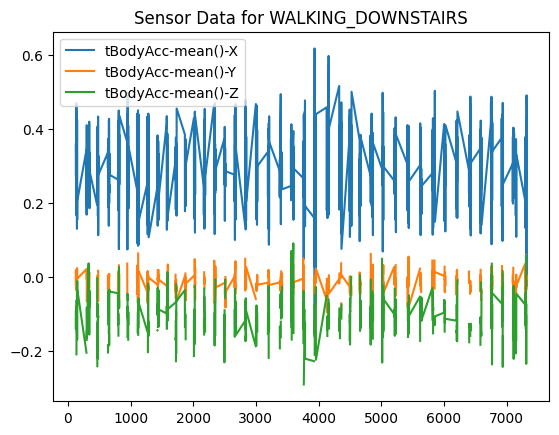

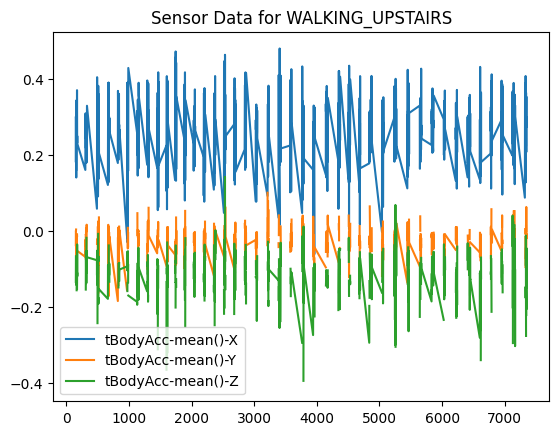

In [21]:

# Basic statistics of the dataset
print(train_data.describe())

# Visualization - Plotting sensor data for different activities
activities = train_data['Activity'].unique()
for activity in activities:
    subset = train_data[train_data['Activity'] == activity].iloc[:, :3] # Selecting first three columns for simplicity
    subset.plot(title=f'Sensor Data for {activity}')
    plt.show()


In [22]:
# Drop any rows with missing values in the "Activity" column
train_data = train_data.dropna(subset=['Activity'])

# Calculate mean values for columns other than 'Activity'
mean_values = train_data.drop(columns=['Activity']).mean()

# Handling missing values using mean imputation for specific columns
train_data_cleaned = train_data.fillna(mean_values)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data_cleaned.iloc[:, :-1])  # Assuming the last column is the activity label
y_train = train_data_cleaned.iloc[:, -1]

# Also applying the same transformation to the test dataset
test_data = test_data.dropna(subset=['Activity'])

# Use mean values from the training data to fill missing values in the test data
test_data_cleaned = test_data.fillna(mean_values)

X_test = scaler.transform(test_data_cleaned.iloc[:, :-1])
y_test = test_data_cleaned.iloc[:, -1]


In [23]:

# Using Logistic Regression for classification
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\rober\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:

# Evaluating the model on the testing set
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       537
           SITTING       0.84      0.75      0.79       491
          STANDING       0.77      0.88      0.82       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.90      0.93       420
  WALKING_UPSTAIRS       0.94      0.90      0.92       471

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947

[[512   8  17   0   0   0]
 [  5 367 117   0   0   2]
 [  0  64 468   0   0   0]
 [  0   0   1 480  10   5]
 [  0   0   1  19 378  22]
 [  0   0   0  39   8 424]]



## Conclusion

Summarize the performance of the model. Discuss areas for potential improvement in future iterations.

## Areas for Discussion

- Advanced feature engineering
- Complex model selection
- Hyperparameter tuning
- Alternate imputation methods
- Cross-validation methods
- Handling imbalanced datasets
